https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/edit?usp=sharing

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it vsua
lly.
Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and
 180.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('C:/Users/razil/Downloads/p1.csv')
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
data.tail(9)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
449,Rodney Hood,Utah Jazz,5,SG,23,06-Aug,206,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2,SF,28,06-Aug,226,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23,SF,26,06-Jun,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [5]:
data.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [7]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['Height']=np.random.uniform(150,180,size=len(data))
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,153.335231,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,167.701237,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,170.320147,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,154.567617,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150.882097,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,174.352881,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,162.238929,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,154.717173,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,166.900693,231,Kansas,947276.0


1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [10]:
data['Team'].value_counts()

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

2.Segregate the employees w.r.t different positions.

In [11]:
employees=data.groupby('Position')['Name'].apply(list)
for Position, Names in employees.items():
    print(f"Employees in {Position} position: ")
    for name in Names:
        print(name)
    print("\n")    

Employees in C position: 
Kelly Olynyk
Jared Sullinger
Tyler Zeller
Brook Lopez
Henry Sims
Robin Lopez
Kevin Seraphin
Joel Embiid
Jahlil Okafor
Bismack Biyombo
Lucas Nogueira
Jonas Valanciunas
Andrew Bogut
Festus Ezeli
Marreese Speights
Cole Aldrich
DeAndre Jordan
Tarik Black
Roy Hibbert
Robert Sacre
Tyson Chandler
Alex Len
Alan Williams
Willie Cauley-Stein
DeMarcus Cousins
Kosta Koufos
Pau Gasol
Joakim Noah
Sasha Kaun
Timofey Mozgov
Tristan Thompson
Joel Anthony
Aron Baynes
Andre Drummond
Jordan Hill
Ian Mahinmi
Greg Monroe
Miles Plumlee
JaVale McGee
Salah Mejri
Zaza Pachulia
Dwight Howard
Josh Smith
Marc Gasol
Alexis Ajinca
Omer Asik
Kendrick Perkins
Matt Bonner
Boris Diaw
Tim Duncan
Boban Marjanovic
Al Horford
Tiago Splitter
Walter Tavares
Al Jefferson
Frank Kaminsky III
Cody Zeller
Hassan Whiteside
Dewayne Dedmon
Nikola Vucevic
Marcin Gortat
JJ Hickson
Nene Hilario
Nikola Jokic
Joffrey Lauvergne
Jusuf Nurkic
Gorgui Dieng
Nikola Pekovic
Karl-Anthony Towns
Steven Adams
Enes Kanter
Na

3.Find from which age group most of the employees belong to.

In [12]:
a=pd.cut(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60])
a

0      (20, 25]
1      (20, 25]
2      (25, 30]
3      (20, 25]
4      (25, 30]
         ...   
453    (25, 30]
454    (20, 25]
455    (25, 30]
456    (25, 30]
457    (20, 25]
Name: Age, Length: 458, dtype: category
Categories (9, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (40, 45] < (45, 50] < (50, 55] < (55, 60]]

In [13]:
agroup=a.value_counts().idxmax()
print("maximum number of employees is from the age group ",agroup)

maximum number of employees is from the age group  (20, 25]


4.Find out under which team and position, spending in terms of salary is high.

In [14]:
high_salary=pd.DataFrame(data.groupby(["Team","Position"],as_index=False)['Salary'].sum().sort_values(by="Salary",ascending=False))
high_salary

,Team,Position,Salary
67,Los Angeles Lakers,SF,31866445.0
75,Miami Heat,PF,31538671.0
53,Houston Rockets,SG,28122883.0
116,Phoenix Suns,PG,28002998.0
37,Denver Nuggets,SF,27982771.0
...,...,...,...
38,Denver Nuggets,SG,2790245.0
112,Philadelphia 76ers,SF,1845059.0
125,Sacramento Kings,PF,1370152.0
74,Miami Heat,C,981348.0


In [15]:
high_salary["Salary"].max()

31866445.0

In [16]:
high_salary.loc[high_salary["Salary"]==31866445.0,["Team","Position"]]

,Team,Position
67,Los Angeles Lakers,SF


5.Find if there is any correlation between age and salary , represent it visually.

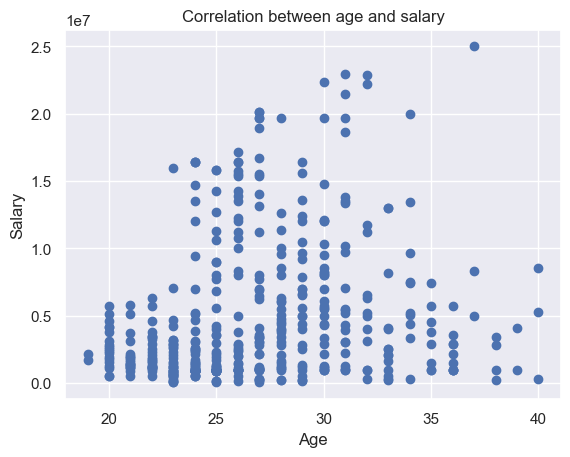

In [17]:
x='Age'
y='Salary'
plt.scatter(data["Age"],data["Salary"])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Correlation between age and salary')
plt.show()

In [18]:
c=data[['Age','Salary']].corr()
c        

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


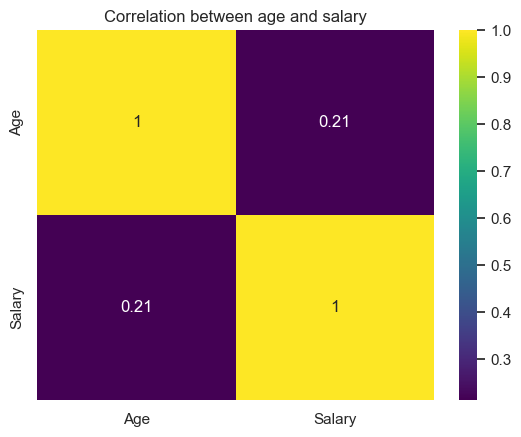

In [19]:
sns.heatmap(c,annot=True,cmap='viridis')
plt.title('Correlation between age and salary')
plt.show()